In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import seaborn as sns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True, connected=True)
%matplotlib widget
import matplotlib.pyplot as plt
import TiOT_lib
from TiOT_lib import TiOT, eTiOT, TAOT, eTAOT
import os
import time



In [2]:
def process_data(dataset_name ):
    filepath = os.path.join("time_series_kNN", dataset_name, dataset_name + "_TRAIN.txt" )

    with open(filepath, "r") as file:
        data = [line.strip().split() for line in file]

    # Convert to numerical values if needed
    data = [[float(value) for value in row] for row in data]

    X = [row[1:] for row in data]

    return X

def fast_eTiOT(x,y):
    return eTiOT(x, y, w_update_freq=20)

def get_runtime(x,y, metric):
    start = time.perf_counter()
    metric(x,y)
    end = time.perf_counter()
    return end - start

def get_runtime_BCD(series1, series2 ,tolerance, t0):
    start = time.perf_counter()
    TiOT_lib.entropic_TiOT_BCDsolver(series1, series2, gamma=0.01, solver=2, tolerance=tolerance, maxIter=10000, t0=t0)
    end = time.perf_counter()
    return end - start

def get_runtimeLP(series1, series2):
    start = time.perf_counter()
    TiOT_lib.TiOT_LPsolver(series1, series2)
    end = time.perf_counter()
    return end - start

def get_runtimeTAOT(series1, series2):
    start = time.perf_counter()
    TiOT_lib.TAOT_distance(series1, series2, maxIter=10000)
    end = time.perf_counter()
    return end - start

In [3]:
X = process_data('Rock')

In [5]:
lengths = [100, 200] #, 300, 400, 500, 600
metrics = [TiOT, eTiOT, fast_eTiOT, TAOT, eTAOT]
metric_names = [metric.__name__ for metric in metrics]
results = {**{'len': lengths}, **{name: [] for name in metric_names}}
num_point = 1
point1_index = range(1,1 + num_point + 1)
point2_index = range(10,10 + num_point + 1)
for length in lengths:
    for metric in metrics:
        s = 0
        for i in range(num_point):
            s += get_runtime(X[point1_index[i]][:length], X[point2_index[i]][:length], metric)
        results[metric.__name__].append(s / num_point)

In [ ]:
import seaborn as sns
plot_file = os.path.join("kNN_data","plots", "Comparison on " + dataset_name + eps_name + ".pdf")
sns.set(style="whitegrid", context="paper")
plt.figure(figsize=(8, 5))
markers = ['o', 's', '^', 'D', 'v', 'P', 'X']
i = 0
for name in metric_names:
    plt.plot(lengths, results[name], label = name, linewidth=1.5)
    i+=1
plt.xlabel(r"$\varepsilon$", fontsize = 14)
plt.ylabel("Error", fontsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig(plot_file, dpi=300)  # High-resolution
plt.show()

In [ ]:
TiOT_lib.TiOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end:step])

NameError: name 'TiOT_lib' is not defined

In [37]:
TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-50:step], w = 0.1, costmatrix=TiOT_lib.costmatrix4)

(0.1587389592302359,
 array([[0.00145258, 0.        , 0.0025939 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00373521, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.00086463, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00546448, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.00546448]]))

In [38]:
TiOT_lib.eTAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end:step], w = 0.1, costmatrix=TiOT_lib.costmatrix4)

Shape checking: (183,), (183, 183)
total iteration 1000


(0.22295528892773753,
 array([[1.32760031e-03, 7.91866151e-04, 9.21386487e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.87200119e-04, 1.47601537e-04, 1.46765965e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.07871511e-04, 5.41575074e-05, 1.35310167e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.67547674e-15, 4.17956251e-06, 2.11094614e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.15453695e-17, 7.76992604e-08, 3.07970148e-08],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.45277280e-10, 1.61003470e-03, 1.71619067e-03]]))

In [13]:
res

(array([-2.17231296e+00, -2.34946532e+00, -2.33716373e+00, -2.21851799e+00,
        -2.35049232e+00, -2.26371561e+00, -2.23572514e+00, -2.09758604e+00,
        -1.52147111e+00, -1.90109045e+00, -1.18706564e+00, -1.51876798e+00,
        -1.16400303e+00, -1.69137221e+00, -1.38206528e+00, -1.54547702e+00,
        -1.03855395e+00, -1.53997933e+00, -1.61387903e+00, -1.66192817e+00,
        -1.64017428e+00, -1.68673180e+00, -1.44787278e+00, -1.43790346e+00,
        -1.50546463e+00, -1.46599146e+00, -1.43520029e+00, -1.31043192e+00,
        -1.32778364e+00, -1.27936035e+00, -1.10778889e+00, -1.14076225e+00,
        -1.09064836e+00, -7.95322201e-01, -8.97704732e-01, -1.02980689e+00,
        -1.01947840e+00, -1.09869516e+00, -1.13248012e+00, -1.06939260e+00,
        -1.05827559e+00, -1.01706594e+00, -1.01688900e+00, -9.67947514e-01,
        -8.93602872e-01, -6.39036363e-01, -9.54389139e-01, -9.44455148e-01,
        -8.94602644e-01, -8.71347173e-01, -8.08144396e-01, -5.27821069e-01,
        -4.6

In [9]:
ends = [200+ 10*i for i in range(5)]
tol4t2 = [get_runtime_BCD(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end:step], tolerance=10**-4, t0 = 10**-2) for end in ends]
tol4t3 = [get_runtime_BCD(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end:step], tolerance=10**-4, t0 = 10**-3) for end in ends]
lp = [get_runtimeLP(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end:step]) for end in ends]

BCD Algorithm converges after 2260 iterations
BCD Algorithm converges after 2060 iterations
BCD Algorithm converges after 2460 iterations
BCD Algorithm converges after 2880 iterations
BCD Algorithm converges after 2580 iterations
BCD Algorithm converges after 1620 iterations
BCD Algorithm converges after 1640 iterations
BCD Algorithm converges after 1740 iterations
BCD Algorithm converges after 1840 iterations
BCD Algorithm converges after 1860 iterations


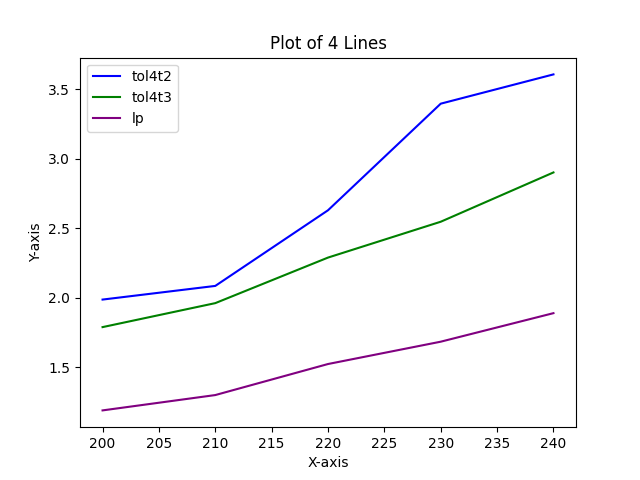

In [10]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(ends, tol4t2, label='tol4t2', color='blue')
plt.plot(ends, tol4t3, label='tol4t3', color='green')
plt.plot(ends, lp, label='lp', color='purple')


# Add title and labels
plt.title('Plot of 4 Lines')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add legend
plt.legend()
plt.savefig("Running time graph1.png")
# Show the plot
plt.show()

In [3]:
length = 10000
x = np.linspace(0, length, length+1)

# Three sine functions with different frequencies and amplitudes
y1 = np.sin(0.1*x)          # First sine wave
y2 = 0.1 * np.sin(0.12 * x)  # Second sine wave
y3 = 0.3 * np.sin(0.3 * x)  # Third sine wave

# Combine the sine functions to create the time series
time_series = y1 + y2 + y3

# Add random noise to the time series
noise = np.random.normal(0, 0.1, length+1)  # Gaussian noise with mean 0 and standard deviation 0.2
time_series_with_noise = time_series + noise

In [ ]:
ends = [2300, 2500, 3000] #,200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1500, 1700, 2000, 2300, 2500, 3000
tol4t2 = []
lp = []
taot = []
lag = 150
for end in ends:
    tol4t2.append(get_runtime_BCD(time_series_with_noise[:end], time_series_with_noise[lag:lag+end], tolerance=10**-4, t0 = 10**-2))
    #lp.append(get_runtimeLP(time_series_with_noise[:end], time_series_with_noise[lag:lag+end]))
    taot.append(get_runtimeTAOT(time_series_with_noise[:end], time_series_with_noise[lag:lag+end]))
    print(f"=====>   Completed end = {end}")


BCD Algorithm converges after 1080 iterations
total iteration 3500
=====>   Completed end = 2300
BCD Algorithm converges after 960 iterations
total iteration 3460
=====>   Completed end = 2500
BCD Algorithm converges after 980 iterations
total iteration 3440
=====>   Completed end = 3000


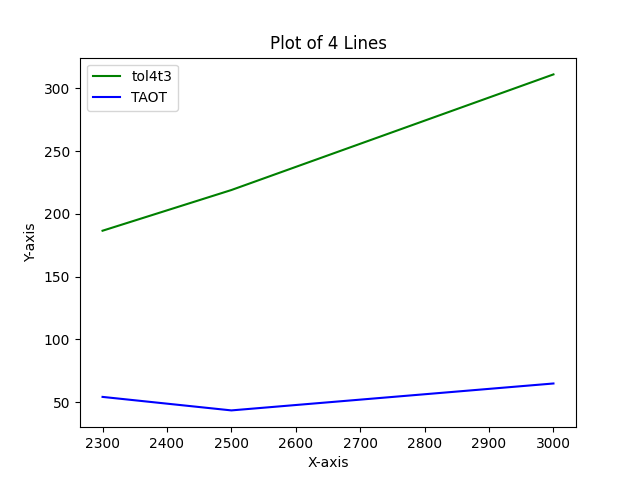

In [13]:
plt.clf()
np.savetxt("TiOT_tol4t2.txt", np.array(tol4t2))
#np.savetxt("TiOT_LP.txt", np.array(lp))
np.savetxt("TAOT.txt", np.array(taot))

plt.plot(ends, tol4t2, label='tol4t2', color='green')

#plt.plot(ends, lp, label='lp', color='purple')

plt.plot(ends, taot, label = 'TAOT', color = 'blue')

# Add title and labels
plt.title('Plot of 4 Lines')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add legend
plt.legend()
plt.savefig("Running time graph2.png")
# Show the plot
plt.show()

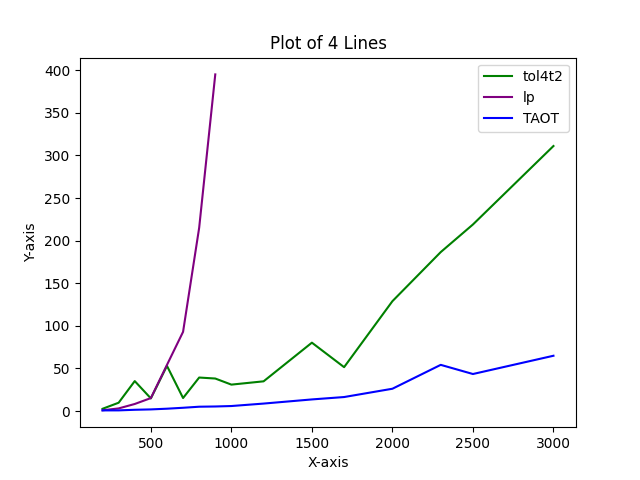

In [17]:
ends = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1500, 1700, 2000, 2300, 2500, 3000]
lp = np.loadtxt("TiOT_LP_cum.txt")
taot = np.loadtxt("TAOT_cum.txt")
tol4t2 = np.loadtxt("TiOT_tol4t3_cum.txt")
plt.clf()
plt.plot(ends, tol4t2, label='tol4t2', color='green')

plt.plot(ends[: len(lp)], lp, label='lp', color='purple')

plt.plot(ends, taot, label = 'TAOT', color = 'blue')

# Add title and labels
plt.title('Plot of 4 Lines')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add legend
plt.legend()
plt.savefig("Running time graph2.png")
# Show the plot
plt.show()